# Régression linéaire multiple

In [1]:
import pandas as pd 
import numpy as np

from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
from matplotlib import pyplot as plt

## Création du dataset

In [2]:
#on créé maintenant un dataset composant de d'échantillants ayant chacun 2 features
x, y = make_regression (n_samples=200, n_features=2, noise=10)

y=y.reshape(y.shape[0], 1)

print(x.shape)
print(y.shape)
print(x)
print(y)

(200, 2)
(200, 1)
[[ 7.32783519e-01 -2.16088239e-01]
 [-1.45087639e+00 -4.58166725e-01]
 [ 8.07718380e-01 -1.12299467e+00]
 [ 2.22360937e-01  1.19160807e+00]
 [ 1.41962125e-01 -2.51834624e-01]
 [ 8.13173168e-02 -9.79032732e-01]
 [ 3.50110093e-01 -6.02768945e-01]
 [ 2.14529279e-01  7.63981900e-01]
 [ 7.33289742e-01  1.22264496e+00]
 [-1.30097832e+00 -7.21966190e-01]
 [-9.96679958e-02 -4.12000657e-01]
 [-2.75658915e+00  1.67348291e+00]
 [ 1.62790984e+00  6.28061341e-01]
 [-1.22551470e-01  1.43793719e+00]
 [ 2.09909726e-01 -2.77983049e+00]
 [ 1.03971503e+00  4.92501496e-01]
 [ 1.16581351e+00  1.08427146e+00]
 [-1.23331045e+00 -2.12219305e+00]
 [-1.09911700e+00 -2.61411048e-01]
 [ 1.51451809e+00  4.06557086e-01]
 [-1.10443693e+00  1.75728691e+00]
 [ 3.86658685e-01  9.71921440e-02]
 [ 1.13675833e+00  8.22122658e-01]
 [-9.68292771e-01  5.18323573e-01]
 [ 9.46819674e-01  9.76651122e-01]
 [ 2.70305683e-01 -1.26329403e+00]
 [-2.73328027e-01 -1.35086441e+00]
 [ 8.18575763e-02  4.00541764e-01]
 [

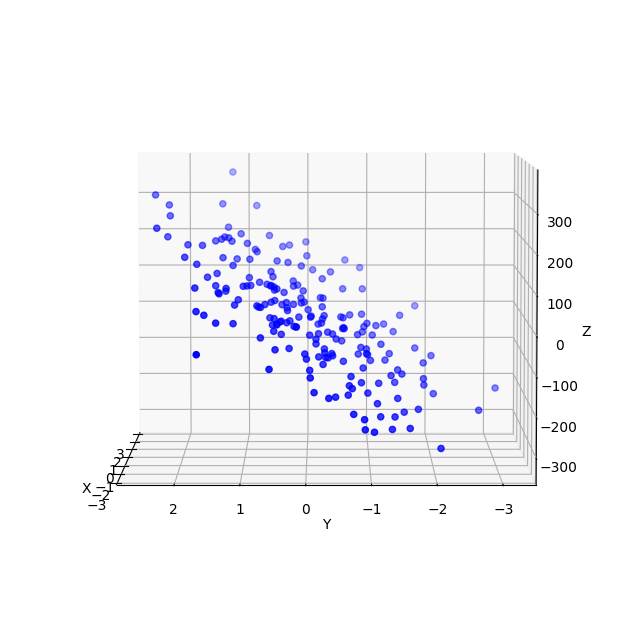

In [3]:
# Représentation graphique du modèle en 3d 
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, c='b', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(5, 180)
plt.show()


## Modèle

In [4]:
#notre modèle qui calcule les y_predictions en fonction de x
def model(X, theta):
    return np.dot(X, theta)

## Fonction de coûts

In [5]:
def cout(X, y, theta):
    return (1/(2*len(y))) * np.sum((model(X, theta) - y)**2)


## Descente de Gradient (DG)

In [6]:
#Maintenant, on utilise la descente de gradients pour minimiser la fonction F et trouver les paramètres a, b optimaux
def gradient(X, y, theta):
    return (1/len(y)) * np.dot(X.T, (model(X, theta) - y))

def descenteGradient(X, y, theta, learning_rate, n_iterations):
    histCout=np.zeros(n_iterations)
    for iteration in range(0, n_iterations):
        theta = theta - learning_rate*gradient(X, y, theta)
        histCout[iteration]= cout(X,y,theta)

    return theta, histCout

def coefDet(y, y_predictions):
    u=((y-y_predictions)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

## Prédiction du modèle à l'aide d'une régression linéaire multiple

In [7]:
#on va utiliser une régression linéaire multiple, avec n paramètres 
theta = np.random.randn(3,1)
print(theta.shape)
print(theta)

(3, 1)
[[-0.98171814]
 [ 0.26549541]
 [ 1.12426119]]


In [8]:
X = np.hstack((x, np.ones((x.shape[0],1))))
print(X.shape)
print(X)


(200, 3)
[[ 7.32783519e-01 -2.16088239e-01  1.00000000e+00]
 [-1.45087639e+00 -4.58166725e-01  1.00000000e+00]
 [ 8.07718380e-01 -1.12299467e+00  1.00000000e+00]
 [ 2.22360937e-01  1.19160807e+00  1.00000000e+00]
 [ 1.41962125e-01 -2.51834624e-01  1.00000000e+00]
 [ 8.13173168e-02 -9.79032732e-01  1.00000000e+00]
 [ 3.50110093e-01 -6.02768945e-01  1.00000000e+00]
 [ 2.14529279e-01  7.63981900e-01  1.00000000e+00]
 [ 7.33289742e-01  1.22264496e+00  1.00000000e+00]
 [-1.30097832e+00 -7.21966190e-01  1.00000000e+00]
 [-9.96679958e-02 -4.12000657e-01  1.00000000e+00]
 [-2.75658915e+00  1.67348291e+00  1.00000000e+00]
 [ 1.62790984e+00  6.28061341e-01  1.00000000e+00]
 [-1.22551470e-01  1.43793719e+00  1.00000000e+00]
 [ 2.09909726e-01 -2.77983049e+00  1.00000000e+00]
 [ 1.03971503e+00  4.92501496e-01  1.00000000e+00]
 [ 1.16581351e+00  1.08427146e+00  1.00000000e+00]
 [-1.23331045e+00 -2.12219305e+00  1.00000000e+00]
 [-1.09911700e+00 -2.61411048e-01  1.00000000e+00]
 [ 1.51451809e+00  4.0

In [9]:
#on optimise le modèle avec la descente de gradient
resultDescenteGradientPol = descenteGradient(X, y, theta, 0.01, 1000)
newTheta = resultDescenteGradientPol[0]
varCout = resultDescenteGradientPol[1]

print(newTheta.shape)
print(newTheta)

(3, 1)
[[82.11930956]
 [96.07700844]
 [-1.29370888]]


In [20]:
y_predictions = model(X, newTheta)

array([], shape=(0, 3), dtype=float64)

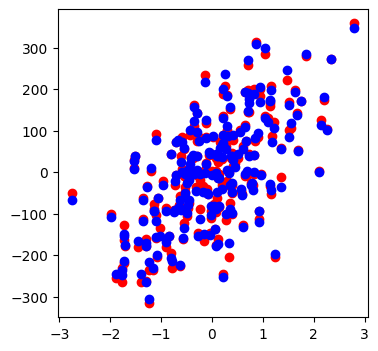

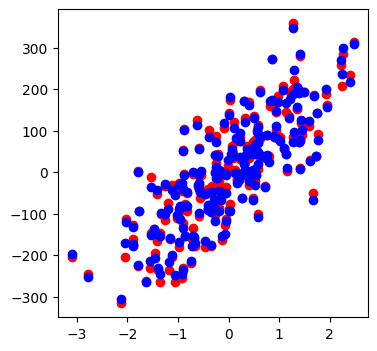

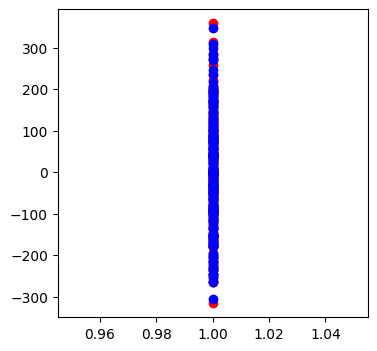

In [36]:
for i in range(X.shape[1]):
    plt.figure(figsize=[4,4])
    plt.scatter(X[:,i], y, c='red')
    plt.scatter(X[:,i],y_predictions, c='blue')

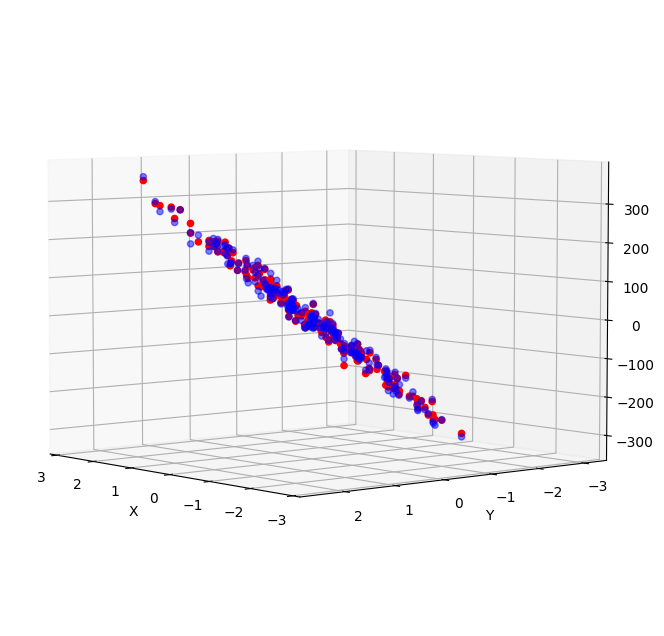

In [15]:
x1, x2 = np.linspace(-2, 2, 1), np.linspace(-2, 2, 1)
X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y, color='b', alpha=0.5)
ax.scatter(x[:,0], x[:,1], y_predictions, color='r', alpha=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(5,-220)
plt.show()

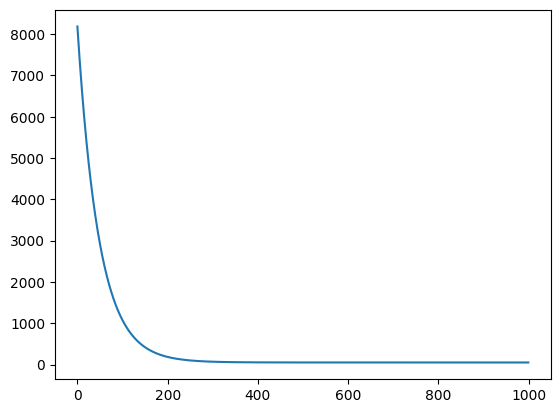

In [11]:
#on affiche la variation des couts au fil de la descente des gradients
plt.plot([i for i in range(1000)], varCout)

In [12]:
#on calcule le coefficient de prédiction, plus le chiffre est proche de 1, mieux la prédiction est fidèle à la réalité
coeffPredictions_pol = coefDet(y, y_predictions)
print(coeffPredictions_pol)

0.9938340587428321
